<h1 align="center" style="color: blue; font-weight: bold;
font-family: 'Fira Code', monospace;">Practical Lab 7 - Performance Metrics for Classification Problems</h1>

Abstract: This notebook presents an evaluation of a model for MNIST classification. The dataset is initially explored through an Exploratory Data Analysis, focusing on image data. A subset of classes is chosen for classification, and the dataset is split into training, validation, and test sets. A model, is trained and evaluated on the validation dataset for accuracy, confusion matrix, precision, recall, and F1 score for each class

### **Import the neccessary Packages** ###

In [101]:
import numpy as np
import pandas as pd

# plotting modules
from matplotlib import pyplot as plt
import matplotlib.patches as patches  # for curved arrows
import seaborn as sns
from sklearn.model_selection import train_test_split

# The web source of the MNIST dataset that we will work with
from sklearn.datasets import fetch_openml

# The classifiers we will use in this notebook
from sklearn.svm import SVC
# cross validation functions
from sklearn.model_selection import cross_validate, cross_val_predict

# performance metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_recall_curve


### **Load the Data** ###

The Modified National Institute of Standards and Technology (MNIST) database is a sizable handwritten digit database that is frequently used to train different image processing systems.Additionally, the database is frequently utilized for machine learning testing and training. By "re-mixing" the samples from the original NIST datasets, it was produced.
The MNIST database contains 60,000 training images and 10,000 testing images. [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)

784 stands for the pixel format 28*28.



In [102]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

### **Data Exploration** ###

In [103]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

An object called a Bunch object (docs) is what fetch_openml returns. A common sklearn object for storing datasets is this one.



In [104]:
type(mnist)

sklearn.utils._bunch.Bunch

Comprehensive overview of the dataset's structure. It provides information about the components of the MNIST dataset, including data, target labels, metadata frames, category information, feature names, target names, dataset description, details, and URL reference.

In [105]:
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [106]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Let's look into the data and target

In [107]:
mnist.data.shape

(70000, 784)

70000 represents the total number of images in the MNIST dataset.
784 represents the value of each pixel. Each image is represented as a 28x28 pixel grid, hence 784 (28x28) features.

In [108]:
mnist.data[0,200:205]

array([  0,   0,   0,  49, 238], dtype=int64)

 mnist.data[0,200:205] represents the pixel values of the 201st to 205th pixels in the first image of the dataset, which are [0, 0, 0, 49, 238].

In [109]:
mnist.target.shape

(70000,)

In [110]:
print(mnist.target[0], mnist.target[1], mnist.target[2])


5 0 4


The mnist.target array contains the labels corresponding to each image in the dataset.
mnist.target[0], mnist.target[1], mnist.target[2] correspond to the labels for the first three images, which are 5, 0, and 4.

Rename these objects to our familiar conventions

In [111]:
X = mnist.data
y = mnist.target.astype(int)

Examining the actual data instance, which consists of a single image

In [112]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

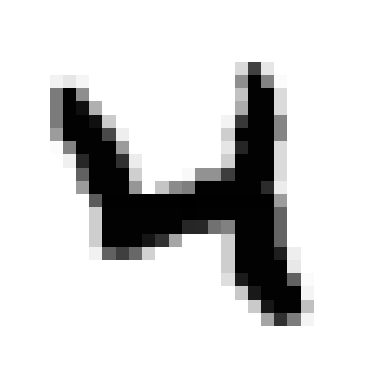

In [113]:
some_digit = X[20]  # here we are using the 21thg image in the dataset
plot_digit(some_digit)
plt.show()

According to the presented image, the image appears to be a 4. Let see the target value.

In [114]:
y[20]  # the label for the 21th image


4

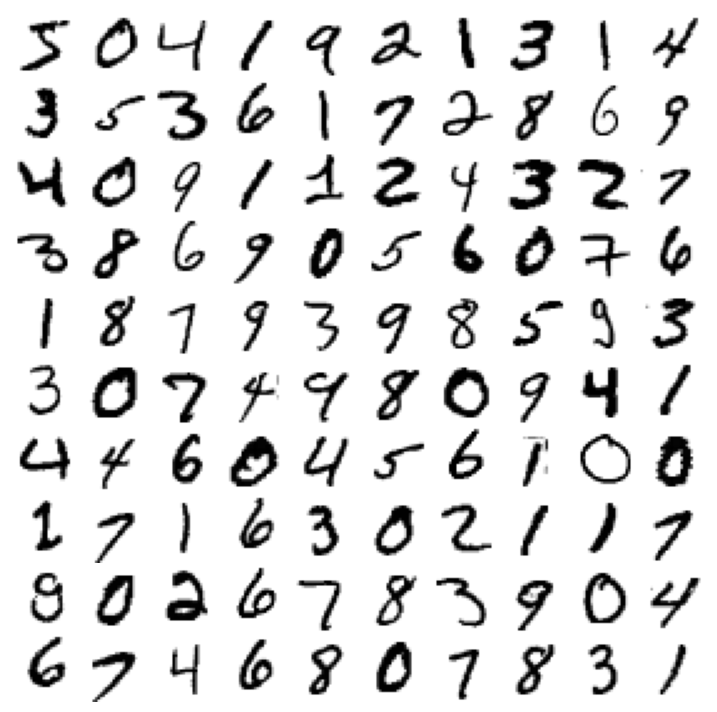

In [115]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

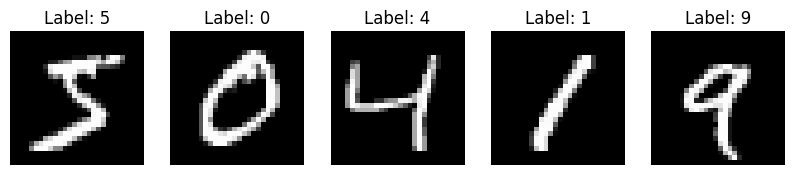

In [116]:
def plot_sample_images(X, y, n_samples=5):
    plt.figure(figsize=(10, 4))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.show()

plot_sample_images(X, y)

The image consists of five handwritten digits, each representing a number.
Iterates over five digits and plots them in a single row.

[KaggleLink](https://www.kaggle.com/code/vbmokin/mnist-model-testing-user-handwritten-digits)

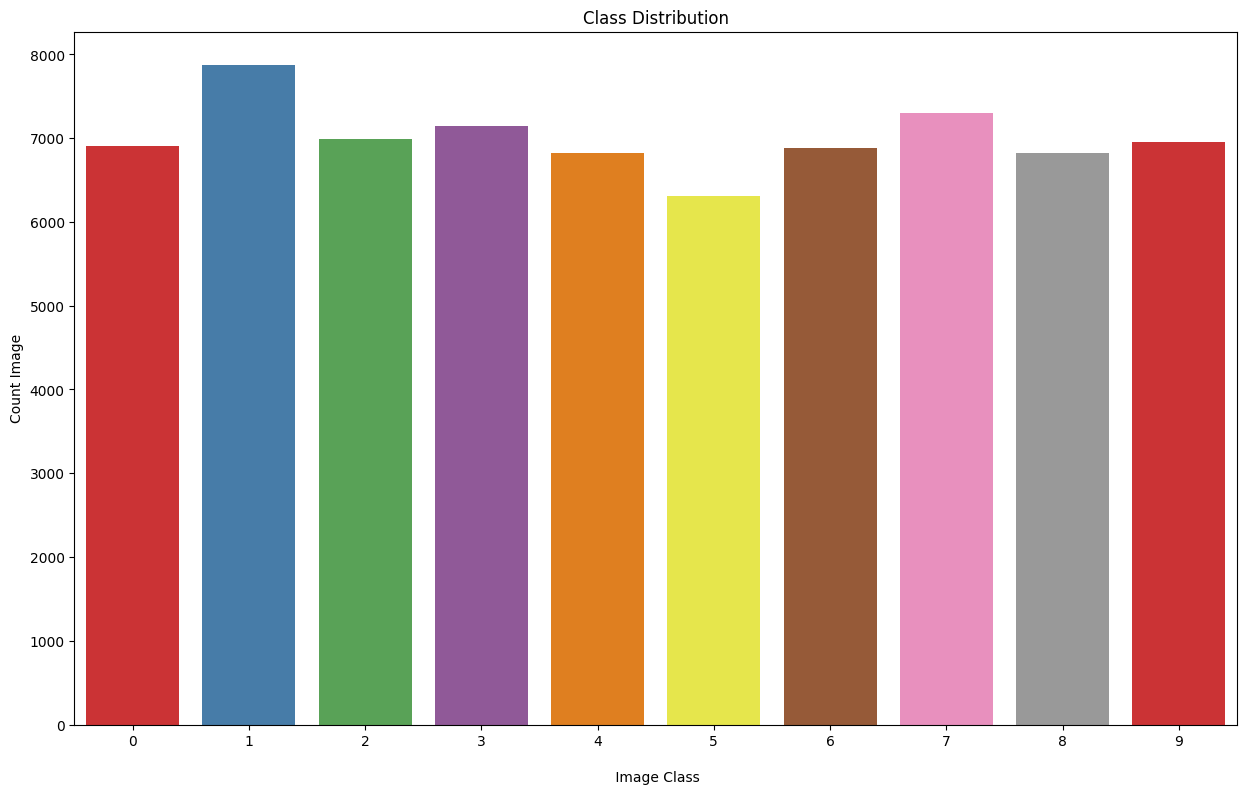

In [117]:
# Check the class distribution
fig, ax = plt.subplots(figsize=(15,9))
sns.countplot(x=y, hue=y, palette='Set1', legend=False)
plt.title('Class Distribution')
plt.xlabel('\n Image Class')
plt.ylabel('Count Image')
plt.show()


It contains a total of 70,000 grayscale images (28x28 pixels each).
The MNIST dataset covers the digits 0 to 9.
Each pixel value in the images represents a greyscale intensity

[Kaggle Link](https://www.kaggle.com/code/faldoae/exploratory-data-analysis-eda-for-image-datasets)

## **Choose the number of classes** ##

In [118]:
# Choose the number of classes
# Select 4 classes
classes = ['4', '5', '6', '7']
indices = np.where(np.isin(mnist.target, classes))
X = mnist.data[indices]
y = mnist.target[indices]

# Convert target labels to integers
y = y.astype(int)

After running this code, we have downloaded the MNIST dataset, performed an exploratory data analysis (EDA), visualized some sample images, checked the class distribution, and chosen the number of classes to work with. Now, let's proceed to split the dataset into train-validation-test sets.

## **Split the dataset to train-validation-test** ##

In [119]:
# Split the dataset into train-validation-test sets
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## **SVM Model** ##

In [120]:
svc_model = SVC(kernel='linear', decision_function_shape='ovr')
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

[Kaggle link](https://www.kaggle.com/code/nishan192/mnist-digit-recognition-using-svm)

## **Evaluation on the validation dataset** ##

Accuracy and Confusion Matrix

In [121]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_recall_curve
classes = ['4', '5', '6', '7']

# Predict on the validation set
y_pred = svc_model.predict(X_val)

# 1. Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# 2. Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.968184939345388
Confusion Matrix:
[[1101   10   17   15]
 [  21  944   18    5]
 [  12   29 1055    0]
 [   9    2    1 1130]]


Precision, recall and F1 for each class

In [122]:
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve

classes = ['4', '5', '6', '7']

# Precision, recall, and F1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred, labels=classes)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Class': classes,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
})

print("Precision, Recall, and F1-score for each class")
print(metrics_df)
print()

Precision, Recall, and F1-score for each class
  Class  Precision    Recall  F1-score
0     4   0.963255  0.963255  0.963255
1     5   0.958376  0.955466  0.956918
2     6   0.967003  0.962591  0.964792
3     7   0.982609  0.989492  0.986038



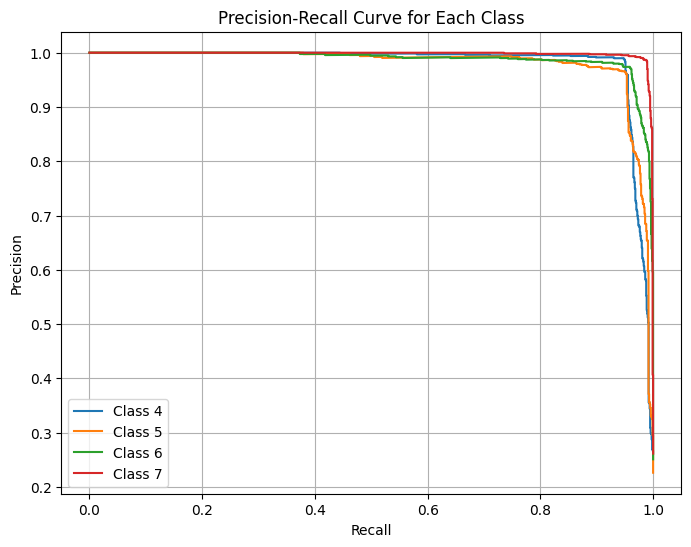

In [123]:
classes = ['4', '5', '6', '7']

# Initialize lists to store precision and recall values
precisions = []
recalls = []

# Loop through each target class
for target_class in classes:
    # Convert target class to integer
    target_class_int = int(target_class)
    
    # Convert target labels to binary for the current class
    y_val_binary = (y_val == target_class_int).astype(int)
    
    # Get the decision function scores for the current class
    y_val_scores = svc_model.decision_function(X_val)
    
    # Get the index of the current class in the classes array
    class_index = classes.index(target_class)
    
    # Extract the decision function scores for the current class
    y_val_scores_class = y_val_scores[:, class_index]
    
    # Compute precision and recall for the current class
    precision, recall, _ = precision_recall_curve(y_val_binary, y_val_scores_class)
    
    # Append precision and recall values to the lists
    precisions.append(precision)
    recalls.append(recall)

# Plot precision-recall curve for each class
plt.figure(figsize=(8, 6))
for precision, recall, target_class in zip(precisions, recalls, classes):
    plt.plot(recall, precision, label=f'Class {target_class}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.grid(True)
plt.show()

## **Precision-Recall plots** ##

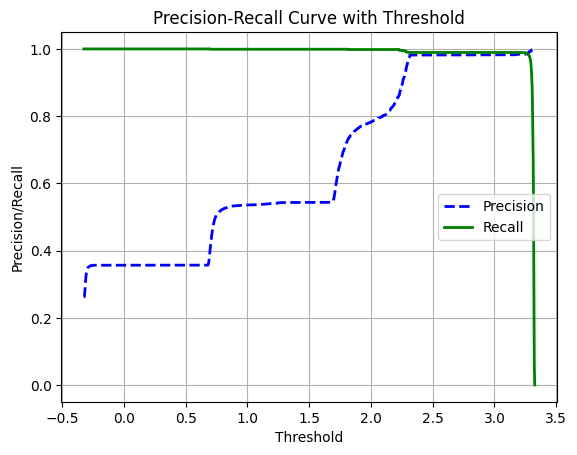

In [124]:
# Compute precision and recall for a specific target class
precision, recall, thresholds = precision_recall_curve(y_val_binary, y_val_scores_class)

# Plot precision-recall curve with threshold on x-axis
plt.plot(thresholds, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recall[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Curve with Threshold")
plt.legend(loc="center right")
plt.grid(True)
plt.show()

The blue dashed line represents precision. As the threshold increases, precision decreases. This is because raising the threshold makes the model more conservative, leading to fewer false positives but potentially missing some true positives.

The green solid line represents recall. Initially, recall remains at 1 (perfect recall) until around threshold 2, where it drops sharply to zero. This indicates that the model becomes too conservative and misses most positive cases.

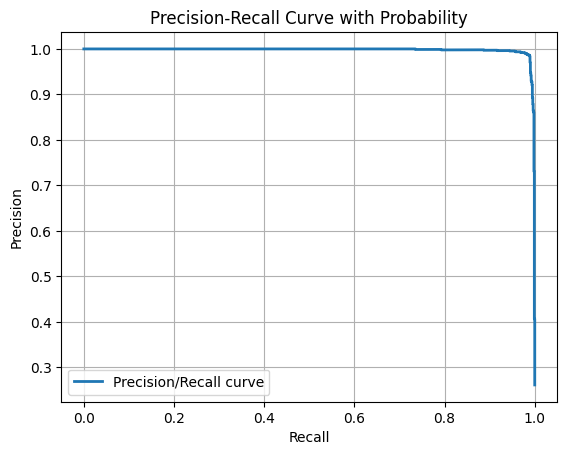

In [125]:
# Compute precision and recall for a specific target class
precision, recall, _ = precision_recall_curve(y_val_binary, y_val_scores_class)

# Plot precision-recall curve with probability on x-axis
plt.plot(recall, precision, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve with Probability")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


The curve’s shape suggests that the model becomes more conservative as the threshold increases.

As recall increases (moving right along the x-axis), precision decreases. 

Increasing Precision:

In [126]:
# Find threshold for a desired precision level 
threshold_90_precision = thresholds[np.argmax(precision >= 0.90)]

# Predict based on new threshold
y_val_pred_90 = (y_val_scores_class >= threshold_90_precision)

# Calculate precision with new threshold
precision_at_90_precision = precision_score(y_val_binary, y_val_pred_90)

print("Precision at 90% precision threshold:", precision_at_90_precision)


Precision at 90% precision threshold: 0.9001584786053882


Increasing Recall:

In [127]:
# Find threshold for a desired recall level 
threshold_90_recall = thresholds[np.argmax(recall >= 0.90)]

# Predict based on new threshold
y_val_pred_90_recall = (y_val_scores_class >= threshold_90_recall)

# Calculate recall with new threshold
recall_at_90_recall = recall_score(y_val_binary, y_val_pred_90_recall)

print("Recall at 90% recall threshold:", recall_at_90_recall)


Recall at 90% recall threshold: 1.0


## **Run on the test set** ##

In [128]:
from sklearn.metrics import classification_report

# Use the trained model to predict labels for the test set
y_test_pred = svc_model.predict(X_test)

# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Generate the confusion matrix to visualize performance
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Test Confusion Matrix:\n", test_conf_matrix)

# Generate the classification report for detailed metrics
test_class_report = classification_report(y_test, y_test_pred)
print("Test Classification Report:\n", test_class_report)


Test Accuracy: 0.9650311241303552
Test Confusion Matrix:
 [[1295   13   13   29]
 [  24 1226   27    9]
 [  19   29 1294    0]
 [  20    8    0 1456]]
Test Classification Report:
               precision    recall  f1-score   support

           4       0.95      0.96      0.96      1350
           5       0.96      0.95      0.96      1286
           6       0.97      0.96      0.97      1342
           7       0.97      0.98      0.98      1484

    accuracy                           0.97      5462
   macro avg       0.96      0.96      0.96      5462
weighted avg       0.97      0.97      0.97      5462



Precision at 90% precision threshold: 0.9002

This indicates that when the model is adjusted to achieve a precision of 90%, it correctly identifies 90.02% of the positive instances out of all instances it predicts as positive.
Recall at 90% recall threshold: 1.0

This means that when the model is adjusted to achieve a recall of 90%, it successfully captures all (100%) of the actual positive instances.
Precision, Recall, and F1-score for each class:

Class 4: Precision = 0.963, Recall = 0.963, F1-score = 0.963

Class 5: Precision = 0.958, Recall = 0.955, F1-score = 0.957

Class 6: Precision = 0.967, Recall = 0.963, F1-score = 0.965

Class 7: Precision = 0.983, Recall = 0.989, F1-score = 0.986

These metrics provide a detailed evaluation of the model's performance for each class, showing how well it predicts each class.
Accuracy: 0.9682

The overall accuracy of the model on the test set is 96.82%, indicating the proportion of correctly classified instances out of all instances.
Confusion Matrix:

The confusion matrix provides a breakdown of the model's predictions compared to the actual labels for each class. It shows the number of true positives, false positives, true negatives, and false negatives for each class.

In conclusion, the model exhibits high precision and recall values for each class, indicating its effectiveness in correctly identifying positive instances and minimizing false positives and false negatives. The high overall accuracy further supports the model's robust performance across all classes. However, further analysis may be needed to assess the model's generalization and potential areas for improvement.